In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 3.4 MB/s eta 0:00:00


# ***Importing Libraries***

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
import pandas as pd
from lightgbm import LGBMRegressor
import lightgbm as lgb
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,mean_absolute_error
from keras.callbacks import ModelCheckpoint
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.optimizers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, GRU, Dense
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten
#import tensorflow_addons as tfa
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from sklearn.svm import SVR
from tensorflow.keras.layers import SimpleRNN
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
#import xgboost as xgb
from catboost import CatBoostRegressor
import statsmodels.api as sm
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import BayesianRidge

import warnings
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'tensorflow_addons'

In [ ]:
!pip install tensorflow-addons

# ***Loading the Dataset***

In [ ]:
!gdown --id 1Cv_QFk2uSOU0eUdRwR8kshrCXAFFuUbI
!gdown --id 1rCV5FOOYPQVGvV_O2vkJ8OyB6XAM19Mb

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:138: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Cv_QFk2uSOU0eUdRwR8kshrCXAFFuUbI
To: /content/yield_df.csv
100% 1.32M/1.32M [00:00<00:00, 93.8MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/cli.py:138: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1rCV5FOOYPQVGvV_O2vkJ8OyB6XAM19Mb
From (redirected): https://drive.google.com/uc?id=1rCV5FOOYPQVGvV_O2vkJ8OyB6XAM19Mb&confirm=t&uuid=27d5f34a-31b1-4e9f-ade5-c6eea4150839
To: /content/myanfis.py
100% 17.7k/17.7k [00:00<00:00, 32.7MB/s]


In [ ]:
df = pd.read_csv('/content/yield_df.csv')
df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485,121.0,16.37
1,Albania,Potatoes,1990,66667,1485,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485,121.0,16.37
3,Albania,Sorghum,1990,12500,1485,121.0,16.37
4,Albania,Soybeans,1990,7000,1485,121.0,16.37


In [ ]:
df.tail()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
28237,Zimbabwe,"Rice, paddy",2013,22581,657,2550.07,19.76
28238,Zimbabwe,Sorghum,2013,3066,657,2550.07,19.76
28239,Zimbabwe,Soybeans,2013,13142,657,2550.07,19.76
28240,Zimbabwe,Sweet potatoes,2013,22222,657,2550.07,19.76
28241,Zimbabwe,Wheat,2013,22888,657,2550.07,19.76


In [ ]:
print("Shape of the dataset : ",df.shape)

Shape of the dataset :  (28242, 7)


# ***Preprocessing of the dataset***

In [ ]:
df.isnull().sum()

Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  object 
 1   Item                           28242 non-null  object 
 2   Year                           28242 non-null  int64  
 3   hg/ha_yield                    28242 non-null  int64  
 4   average_rain_fall_mm_per_year  28242 non-null  int64  
 5   pesticides_tonnes              28242 non-null  float64
 6   avg_temp                       28242 non-null  float64
dtypes: float64(2), int64(3), object(2)
memory usage: 1.5+ MB


In [ ]:
# to check the unique values
for i in df.columns:
    print("-------------------------------",i,"-------------------------------")
    print()
    print(set(df[i].tolist()))
    print()

------------------------------- Area -------------------------------

{'Eritrea', 'Denmark', 'Peru', 'Lebanon', 'Bahrain', 'Thailand', 'Central African Republic', 'Mali', 'Hungary', 'Uganda', 'Albania', 'Morocco', 'Jamaica', 'Slovenia', 'Suriname', 'Spain', 'Switzerland', 'Italy', 'Saudi Arabia', 'Ireland', 'Germany', 'Kenya', 'Iraq', 'Sweden', 'Mexico', 'Tajikistan', 'Uruguay', 'Algeria', 'Senegal', 'Honduras', 'Indonesia', 'Ukraine', 'Canada', 'Colombia', 'Romania', 'Libya', 'Papua New Guinea', 'Lesotho', 'Sri Lanka', 'Greece', 'Finland', 'Guyana', 'Brazil', 'Tunisia', 'Malawi', 'Bangladesh', 'Mauritania', 'Armenia', 'Azerbaijan', 'Austria', 'South Africa', 'Argentina', 'Zimbabwe', 'Malaysia', 'United Kingdom', 'Ghana', 'Australia', 'Nepal', 'Burkina Faso', 'France', 'Rwanda', 'Norway', 'Madagascar', 'Niger', 'Belgium', 'Angola', 'Portugal', 'Japan', 'Poland', 'Ecuador', 'Chile', 'Croatia', 'Montenegro', 'Nicaragua', 'Cameroon', 'New Zealand', 'Burundi', 'Kazakhstan', 'Bahamas', 'Net

In [ ]:
# Check the duplicates record
df.duplicated().sum()

2310

In [ ]:
df.describe()

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,28242.000000,28242.000000,28242.00000,28242.000000,28242.000000
mean,2001.544296,77053.332094,1149.05598,37076.909344,20.542627
std,7.051905,84956.612897,709.81215,59958.784665,6.312051
min,1990.000000,50.000000,51.00000,0.040000,1.300000
25%,1995.000000,19919.250000,593.00000,1702.000000,16.702500
50%,2001.000000,38295.000000,1083.00000,17529.440000,21.510000
75%,2008.000000,104676.750000,1668.00000,48687.880000,26.000000
max,2013.000000,501412.000000,3240.00000,367778.000000,30.650000


In [ ]:
df1 = df.copy()

In [ ]:
x = df1.drop('hg/ha_yield', axis=1)
Y=df['hg/ha_yield'].to_numpy()
y = Y.reshape(-1, 1)

print(x.shape)
print(y.shape)

(28242, 6)
(28242, 1)


In [ ]:
#Label Encoding
label_encoder = LabelEncoder()
x['Area'] = label_encoder.fit_transform(df['Area'])
x['Item'] = label_encoder.fit_transform(df['Item'])

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(x)
print(X)
print(len(X))

scaler = StandardScaler()
Y = scaler.fit_transform(y)
print(Y)
print(len(Y))

[[-1.73404116 -1.29811042 -1.63707532  0.47329419 -0.61636612 -0.66106889]
 [-1.73404116 -0.53918079 -1.63707532  0.47329419 -0.61636612 -0.66106889]
 [-1.73404116 -0.15971597 -1.63707532  0.47329419 -0.61636612 -0.66106889]
 ...
 [ 1.99550277  0.59921367  1.62451233 -0.69323228 -0.57585308 -0.12399147]
 [ 1.99550277  0.97867849  1.62451233 -0.69323228 -0.57585308 -0.12399147]
 [ 1.99550277  1.35814331  1.62451233 -0.69323228 -0.57585308 -0.12399147]]
28242
[[-0.47602001]
 [-0.12225671]
 [-0.63233786]
 ...
 [-0.75229534]
 [-0.64541536]
 [-0.63757593]]
28242


In [ ]:
input_data = pd.DataFrame(X, columns=['Area', 'Item', 'Year', 'average_rain_fall_mm_per_year',
       'pesticides_tonnes', 'avg_temp'])
output_data = pd.DataFrame(Y, columns=['hg/ha_yield'])

display(input_data)
display(output_data)

,Area,Item,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,-1.734041,-1.298110,-1.637075,0.473294,-0.616366,-0.661069
1,-1.734041,-0.539181,-1.637075,0.473294,-0.616366,-0.661069
2,-1.734041,-0.159716,-1.637075,0.473294,-0.616366,-0.661069
3,-1.734041,0.219749,-1.637075,0.473294,-0.616366,-0.661069
4,-1.734041,0.599214,-1.637075,0.473294,-0.616366,-0.661069
...,...,...,...,...,...,...
28237,1.995503,-0.159716,1.624512,-0.693232,-0.575853,-0.123991
28238,1.995503,0.219749,1.624512,-0.693232,-0.575853,-0.123991
28239,1.995503,0.599214,1.624512,-0.693232,-0.575853,-0.123991
28240,1.995503,0.978678,1.624512,-0.693232,-0.575853,-0.123991


,hg/ha_yield
0,-0.476020
1,-0.122257
2,-0.632338
3,-0.759852
4,-0.824592
...,...
28237,-0.641190
28238,-0.870899
28239,-0.752295
28240,-0.645415


In [ ]:
    def split_data(x, y, batch_size,split_ratio):
        # adjust x and y for batch_size
        adj_id = np.arange(len(y) - len(y) % batch_size)
        x, y = x[adj_id, :], y[adj_id]

        # split test & train according to batches
        batches = len(y) / batch_size
        print(batches," batches")
        train_batches = np.round(batches * split_ratio) / batches

        train_id = np.arange(len(y) * train_batches, dtype=int)
        test_id = np.arange(len(y) * train_batches, len(y), dtype=int)

        X_train, y_train, X_test, y_test = x[train_id, :], y[train_id], x[test_id, :], y[test_id]

        return X_train, X_test, y_train, y_test



X_train, X_test, y_train, y_test = split_data(X, Y, 16, 0.8)
X_train, X_val, y_train, y_val = split_data(X_train, y_train, 16, 0.9)


1765.0  batches
1412.0  batches


## Support Vector Regressor

In [ ]:
svm_model = SVR(kernel='rbf', C=1.0, epsilon=0.2)
svm_model.fit(X_train, y_train)
y_pred_svr = svm_model.predict(X_test)
mse_svr = mean_squared_error(y_test, y_pred_svr)
print("Mean Squared Error:", mse_svr)

Mean Squared Error: 1.4565849329093206


## Multi Layer Perceptron

In [ ]:
mlp = Sequential()
mlp.add(Dense(units=64, activation='relu', input_shape=(6,)))
mlp.add(Dense(units=32, activation='relu'))
mlp.add(Dense(units=16, activation='relu'))
mlp.add(Dense(units=1, activation='linear'))
mlp.compile(optimizer='adam', loss='mse')
mlp.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                448       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 3073 (12.00 KB)
Trainable params: 3073 (12.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/1000
509/509 [==============================] - 2s 3ms/step - loss: 0.7556 - val_loss: 1.1557
Epoch 2/1000
509/509 [==============================] - 1s 3ms/step - loss: 0.5338 - val_loss: 1.2555
Epoch 3/1000
509/509 [==============================] - 2s 4ms/step - loss: 0.3783 - val_loss: 1.3697
Epoch 4/1000
509/509 [==============================] - 3s 7ms/step - loss: 0.2700 - val_loss: 0.9421
Epoch 5/1000
509/509 [==============================] - 3s 6ms/step - loss: 0.1968 - val_loss: 0.9156
Epoch 6/1000
509/509 [==============================] - 3s 6ms/step - loss: 0.1517 - val_loss: 0.7751
Epoch 7/1000
509/509 [==============================] - 4s 8ms/step - loss: 0.1223 - val_loss: 0.6844
Epoch 8/1000
509/509 [==============================] - 2s 4ms/step - loss: 0.1027 - val_loss: 0.7590
Epoch 9/1000
509/509 [==============================] - 1s 2ms/step - loss: 0.0876 - val_loss: 0.7226
Epoch 10/1000
509/509 [==============================] - 1s 3ms/step - loss: 0.077

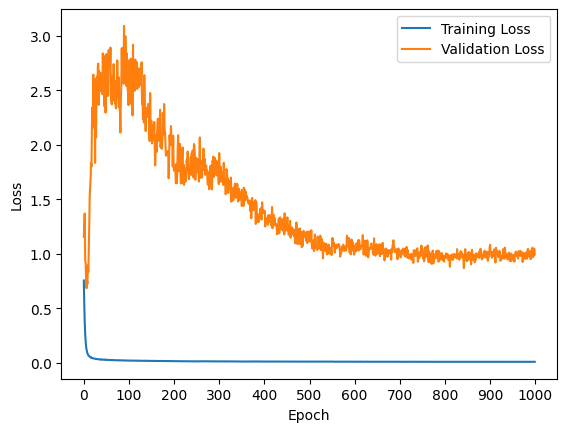

In [ ]:
history_mlp = mlp.fit(X_train, y_train, batch_size=32, epochs=1000, validation_split=0.2)

# Plotting the training and validation loss
plt.plot(history_mlp.history['loss'], label='Training Loss')
plt.plot(history_mlp.history['val_loss'], label = 'Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(range(0, 1001, 100))  # Set x-axis ticks at intervals of 100 epochs
plt.legend()
plt.show()

In [ ]:
y_pred_mlp = mlp.predict(X_test)
mse_mlp = mean_squared_error(y_test, y_pred_mlp)
print("Mean Squared Error:", mse_mlp)

177/177 [==============================] - 0s 2ms/step
Mean Squared Error: 4.333579083792378


## Random Forest Regressor

In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rfr = rf_model.predict(X_test)
mse_rfr = mean_squared_error(y_test, y_pred_rfr)
print("Mean Squared Error:", mse_rfr)

Mean Squared Error: 0.4841355423873847


## Decision Tree Regressor

In [ ]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dtr = dt_model.predict(X_test)
mse_dtr = mean_squared_error(y_test, y_pred_dtr)
print("Mean Squared Error:", mse_dtr)

Mean Squared Error: 0.6835802308963014


## Linear Regression

In [ ]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred_lr)
print("Mean Squared Error:", mse_lr)

Mean Squared Error: 1.0430011914395638


## K-Neighbors Regressor

In [ ]:
knn_model = KNeighborsRegressor(n_neighbors=10)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
mse_knn = mean_squared_error(y_test, y_pred_knn)
print("Mean Squared Error:", mse_knn)

Mean Squared Error: 0.6493420508647519


## Gradient Boosting Regressor

In [ ]:
gbdt_model = GradientBoostingRegressor(n_estimators=50, learning_rate=0.1, max_depth=6, random_state=42)
gbdt_model.fit(X_train, y_train)
y_pred_gbr = gbdt_model.predict(X_test)
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
print("Mean Squared Error:", mse_gbr)

Mean Squared Error: 0.3945744055230951


## XGBoost

In [ ]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
params = {
    'objective': 'reg:squarederror',  #  objective function for regression
    'eval_metric': 'rmse',  # evaluation metric
    'max_depth': 3,  # maximum depth of a tree
    'eta': 0.1,  # learning rate
    'subsample': 0.8,  # subsample ratio of the training instances
    'colsample_bytree': 0.8  # subsample ratio of columns when constructing each tree
}

num_rounds = 60  # number of boosting rounds
xgb_model = xgb.train(params, dtrain, num_rounds)
y_pred_xgb = xgb_model.predict(dtest)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
print("Mean Squared Error:", mse_xgb)

Mean Squared Error: 0.33466626229013924


## Logistic Regression

In [ ]:
#LOGISTIC REGRESSION

X_train = sm.add_constant(X_train)
logit_model = sm.OLS(y_train, X_train)
logit_result = logit_model.fit()
X_test = sm.add_constant(X_test)
y_pred_log = logit_result.predict(X_test)

mse_lor = mean_squared_error(y_test, y_pred_log)
print("Mean Squared Error:", mse_lor)


Mean Squared Error: 1.0430011914395585


## ElasticNet Regressor

In [ ]:
alpha = 0.1  # regularization parameter
l1_ratio = 0.5  # mixing parameter, where 0 <= l1_ratio <= 1
enet_model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, random_state=42)
enet_model.fit(X_train, y_train)

y_pred_en = enet_model.predict(X_test)

mse_en = mean_squared_error(y_test, y_pred_en)
print("Mean Squared Error:", mse_en)


Mean Squared Error: 1.0332880103955433


## Huber Regressor

In [ ]:
huber_model = HuberRegressor()
huber_model.fit(X_train, y_train)
y_pred_hr = huber_model.predict(X_test)
mse_hr = mean_squared_error(y_test, y_pred_hr)
print("Mean Squared Error:", mse_hr)

Mean Squared Error: 1.0635764503359264


## Ridge Regressor

In [ ]:
ridge_model = Ridge(alpha=4.0)
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print("Mean Squared Error (Ridge Regression):", mse_ridge)

Mean Squared Error (Ridge Regression): 1.0429691594149446


## Lasso Regressor

In [ ]:
lasso_model = Lasso(alpha=5.0)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print("Mean Squared Error (Lasso Regression):", mse_lasso)

Mean Squared Error (Lasso Regression): 0.9132956054961122


## Bayesian Ridge Regressor

In [ ]:
bayesian_ridge_model = BayesianRidge()
bayesian_ridge_model.fit(X_train, y_train)
y_pred_brr = bayesian_ridge_model.predict(X_test)
mse_brr = mean_squared_error(y_test, y_pred_brr)
print("Mean Squared Error (Bayesian Ridge Regression):", mse_brr)

Mean Squared Error (Bayesian Ridge Regression): 1.042499005001592


## Light GBM

In [ ]:
lgbm = lgb.LGBMRegressor(num_leaves=2,max_depth=1, learning_rate=0.1)
lgbm.fit(X_train, y_train)
y_pred_lgbm = lgbm.predict(X_test)
mse_lgbm = mean_squared_error(y_test, y_pred_lgbm)
print("Mean Squared Error:", mse_lgbm)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000766 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 671
[LightGBM] [Info] Number of data points in the train set: 20336, number of used features: 6
[LightGBM] [Info] Start training from score 0.013429
Mean Squared Error: 0.5911002498347646


## Catboost

In [ ]:
catboost_model = CatBoostRegressor(iterations=100,
                                   learning_rate=0.01,
                                   depth=5,
                                   loss_function='RMSE')
catboost_model.fit(X_train, y_train)

y_pred_cat = catboost_model.predict(X_test)

mse_cat = mean_squared_error(y_test, y_pred_cat)
print("Mean Squared Error (CatBoostRegressor):", mse_cat)

0:	learn: 0.9800512	total: 10.7ms	remaining: 1.06s
1:	learn: 0.9747534	total: 20.6ms	remaining: 1.01s
2:	learn: 0.9695726	total: 30.1ms	remaining: 974ms
3:	learn: 0.9643124	total: 36.4ms	remaining: 873ms
4:	learn: 0.9592583	total: 39.5ms	remaining: 751ms
5:	learn: 0.9542703	total: 44.6ms	remaining: 699ms
6:	learn: 0.9492741	total: 49.3ms	remaining: 655ms
7:	learn: 0.9443514	total: 53.1ms	remaining: 610ms
8:	learn: 0.9394281	total: 56.5ms	remaining: 572ms
9:	learn: 0.9345507	total: 60.3ms	remaining: 542ms
10:	learn: 0.9296750	total: 64ms	remaining: 518ms
11:	learn: 0.9249773	total: 69.3ms	remaining: 508ms
12:	learn: 0.9202342	total: 74.5ms	remaining: 499ms
13:	learn: 0.9155617	total: 84.9ms	remaining: 522ms
14:	learn: 0.9109587	total: 90.6ms	remaining: 513ms
15:	learn: 0.9065355	total: 98.8ms	remaining: 519ms
16:	learn: 0.9021306	total: 106ms	remaining: 519ms
17:	learn: 0.8977949	total: 114ms	remaining: 519ms
18:	learn: 0.8936033	total: 122ms	remaining: 520ms
19:	learn: 0.8895058	total:

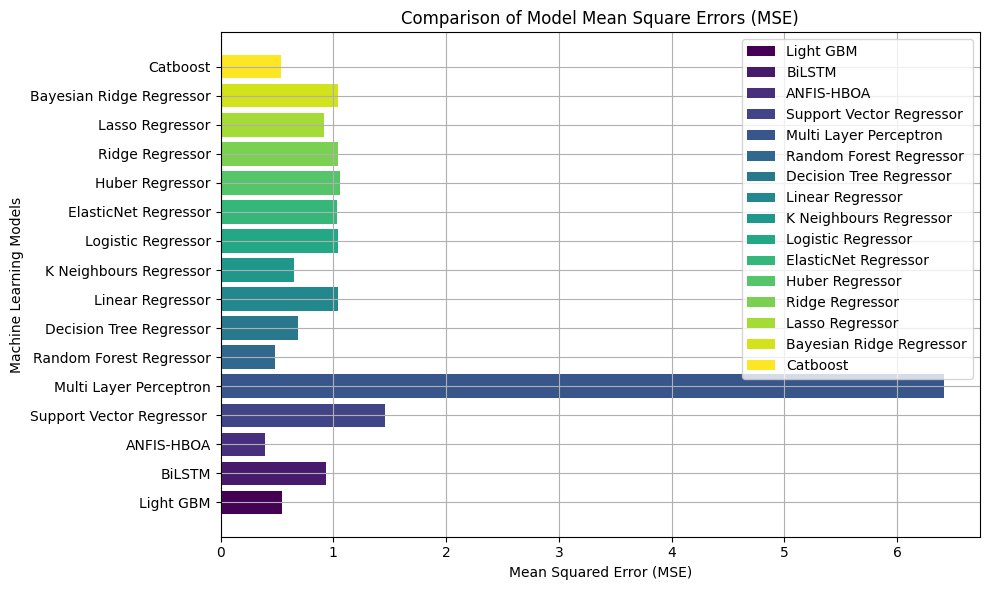

In [ ]:
results = {
    'Light GBM': 0.5444,
    'BiLSTM': 0.9374,
    'ANFIS-HBOA': 0.3974,
    'Support Vector Regressor '  :  1.4565,
    'Multi Layer Perceptron'  :  6.4135,
    'Random Forest Regressor'  :  0.4841,
    'Decision Tree Regressor'  :  0.6835,
    'Linear Regressor'  :  1.0430,
    'K Neighbours Regressor'  :  0.6493,
    'Logistic Regressor'  :   1.0430,
    'ElasticNet Regressor'  :  1.0332,
    'Huber Regressor'  :  1.0635,
    'Ridge Regressor'  :  1.0429,
    'Lasso Regressor'  :  0.9132,
    'Bayesian Ridge Regressor'  :   1.0424,
    'Catboost'  :   0.5359
}
models = list(results.keys())
accuracies = list(results.values())
num_models = len(models)
colors = plt.cm.viridis(np.linspace(0, 1, num_models))
plt.figure(figsize=(10, 6))
bars = plt.barh(models, accuracies, color=colors)
plt.title('Comparison of Model Mean Square Errors (MSE)')
plt.xlabel('Mean Squared Error (MSE)')
plt.ylabel('Machine Learning Models')
plt.grid(True)
plt.legend(bars, models)
plt.tight_layout()
plt.show()



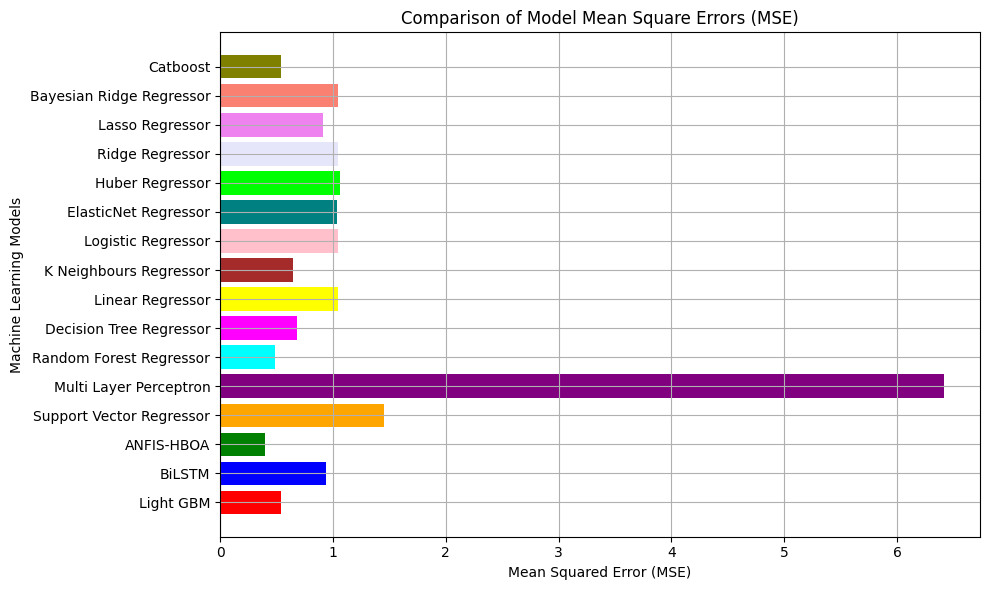

In [ ]:
import matplotlib.pyplot as plt

results = {
    'Light GBM': 0.5444,
    'BiLSTM': 0.9374,
    'ANFIS-HBOA': 0.3974,
    'Support Vector Regressor': 1.4565,
    'Multi Layer Perceptron': 6.4135,
    'Random Forest Regressor': 0.4841,
    'Decision Tree Regressor': 0.6835,
    'Linear Regressor': 1.0430,
    'K Neighbours Regressor': 0.6493,
    'Logistic Regressor': 1.0430,
    'ElasticNet Regressor': 1.0332,
    'Huber Regressor': 1.0635,
    'Ridge Regressor': 1.0429,
    'Lasso Regressor': 0.9132,
    'Bayesian Ridge Regressor': 1.0424,
    'Catboost': 0.5359
}

models = list(results.keys())
accuracies = list(results.values())
num_models = len(models)

# Define a set of distinct colors
colors = ['red', 'blue', 'green', 'orange', 'purple', 'cyan', 'magenta', 'yellow', 'brown', 'pink',
          'teal', 'lime', 'lavender', 'violet', 'salmon', 'olive']

plt.figure(figsize=(10, 6))
bars = plt.barh(models, accuracies, color=colors)
plt.title('Comparison of Model Mean Square Errors (MSE)')
plt.xlabel('Mean Squared Error (MSE)')
plt.ylabel('Machine Learning Models')
plt.grid(True)
plt.tight_layout()
plt.show()
